**Histogram:** 
Histogram is considered as a graph or plot which is related to frequency of pixels in an Gray Scale Image
with pixel values (ranging from 0 to 255). Grayscale image is an image in which the value of each pixel is a single sample, that is, it carries only intensity information where pixel value varies from 0 to 255. Images of this sort, also known as black-and-white, are composed exclusively of shades of gray, varying from black at the weakest intensity to white at the strongest where Pixel can be considered as a every point in an image.

**Histogram Equalization:** Histogram equalization is a technique for adjusting image intensities to enhance contrast.

**Why Do You Use Histogram Equalization?**
Histogram Equalization can be used when you have images that look washed out because they do not have sufficient contrast. In such photographs, the light and dark areas blend together creating a flatter image that lacks highlights and shadows. 

In computer vision and image processing tasks, blurry areas of images do not contain much information due to lack of contrast. For example, we can talk about 'Flower.jpeg' to visualize the wash out effect.

But not to be worried. We can use histogram equalization to overcome this problem. 

**What is skimage and Why Should We Use it?**

There are multiple libraries and frameworks in Python that let us work with image data. So why should we use skimage? It’s a fair question so let me answer that here before we dive into the histogram analysis.

Scikit-image, or skimage, is an open source Python package designed for image preprocessing.

If you have previously worked with sklearn, getting started with skimage will be a piece of cake. Even if you are completely new to Python, skimage is fairly easy to learn and use.

What I really like about skimage is that it has a well-structured documentation that lists down all the modules, sub-modules and functions provided within skimage. 

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [11]:
import skimage.color
import skimage.io
from skimage import data, exposure

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Flower.jpeg to Flower.jpeg


In [13]:
img = cv.imread("Flower.jpeg")

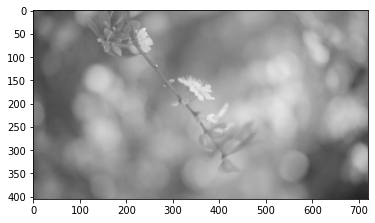

In [14]:
# display the image
fig, ax = plt.subplots()
plt.imshow(img, cmap="gray")

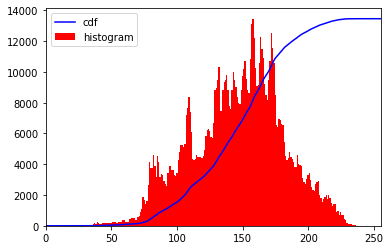

In [15]:
hist,bins = np.histogram(img.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

As displayed in the histogram above, the majority of the pixel intensity ranges between 125 and 175, peaking around at 150. However, you can also see that the far left and right areas do not have any pixel intensity values. This reveals that our test image has poor contrast.

To fix this, we will utilize OpenCV-Python’s .equalizeHist() method to spreads out the pixel intensity values. We will assign the resulting image as the variable ‘equ’.

In [16]:
equ = exposure.equalize_hist(img)


/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


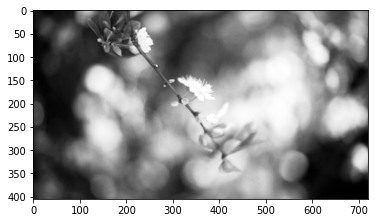

In [17]:
# display the image
fig, ax = plt.subplots()
plt.imshow(equ, cmap="gray")

If you compare the two images above, you will find that the histogram equalized image has better contrast. It has areas that are darker as well as brighter than the original image.

Now, let’s compare the original and the equalized histograms. We will use the same code that we used to view the original histogram.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving equ.jpeg to equ.jpeg


In [18]:
equ = cv.imread('equ.jpeg')

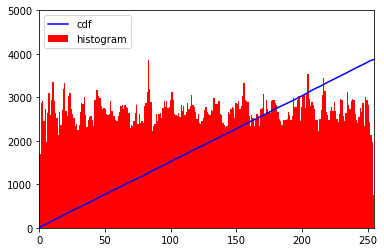

In [19]:
hist,bins = np.histogram(equ.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255]),plt.ylim([0, 5000])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Unlike the original histogram, the pixel intensity values now range from 0 to 255 on the X-axis. In a way, the original histogram has been stretched to the far ends. You may also notice that the cumulative distribution function (CDF) line is now linear as opposed to the original curved line.

**Conclusion**
Histogram equalization is a valuable image preprocessing technique that can be used to obtain extra data from images with poor contrast. 